In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys, PandasTools
from sklearn.metrics import f1_score

# Load data (assuming it's stored in a CSV file)
data = pd.read_csv("tested_molecules.csv")
data.columns = ["SMILES", "PKM2_inhibition", "ERK2_inhibition"]

# Convert inhibition columns to integers
data["PKM2_inhibition"] = data["PKM2_inhibition"].astype(int)
data["ERK2_inhibition"] = data["ERK2_inhibition"].astype(int)

# Convert SMILES strings to numerical features
# Function to convert SMILES to MACCS keys fingerprint
def smiles_to_maccs_keys(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = MACCSkeys.GenMACCSKeys(mol)
    return np.array(fp)

# Apply the function to create the feature matrix
data['features'] = data['SMILES'].apply(smiles_to_maccs_keys)
data = data.dropna(subset=['features'])
PandasTools.AddMoleculeColumnToFrame(data, 'SMILES', 'mol')

# Convert list of arrays to 2D array
X_rf = np.array(data['features'].tolist())

# Create the y matrix for multi-label classification
y = data[['PKM2_inhibition', 'ERK2_inhibition']].values

# Split the data into training and test sets
A_samples = data[data["PKM2_inhibition"] == 1]
B_samples = data[data["ERK2_inhibition"] == 1]
A_train, A_test = train_test_split(A_samples, test_size=0.2, random_state=42)
B_train, B_test = train_test_split(B_samples, test_size=0.2, random_state=42)
train_data_rf = pd.concat([A_train, B_train], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)
test_data_rf = pd.concat([A_test, B_test], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels for Random Forest
X_train_rf, y_train_rf = np.array(train_data_rf['features'].tolist()), train_data_rf[['PKM2_inhibition', 'ERK2_inhibition']].values
X_test_rf, y_test_rf = np.array(test_data_rf['features'].tolist()), test_data_rf[['PKM2_inhibition', 'ERK2_inhibition']].values

# Train the best model
best_rf = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
best_rf.fit(X_train_rf, y_train_rf)
rf_predictions = best_rf.predict(X_test_rf)

# Evaluate the model
rf_report = classification_report(y_test_rf, rf_predictions, target_names=["PKM2_inhibition", "ERK2_inhibition"], zero_division=0)
print("Random Forest Model:")
print(rf_report)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys
from sklearn.metrics import f1_score

# Load data (assuming it's stored in a CSV file)
tested_data = pd.read_csv("tested_molecules.csv")
tested_data.columns = ["SMILES", "PKM2_inhibition", "ERK2_inhibition"]

# Convert inhibition columns to integers
tested_data["PKM2_inhibition"] = tested_data["PKM2_inhibition"].astype(int)
tested_data["ERK2_inhibition"] = tested_data["ERK2_inhibition"].astype(int)

# Convert SMILES strings to numerical features
# Function to convert SMILES to MACCS keys fingerprint
def smiles_to_maccs_keys(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    fp = MACCSkeys.GenMACCSKeys(mol)
    return np.array(fp)

# Apply the function to create the feature matrix
tested_data['features'] = tested_data['SMILES'].apply(smiles_to_maccs_keys)
tested_data = tested_data.dropna(subset=['features'])

# Convert list of arrays to 2D array
X_rf = np.array(tested_data['features'].tolist())

# Create the y matrix for multi-label classification
y = tested_data[['PKM2_inhibition', 'ERK2_inhibition']].values

# Train the best model
best_rf = RandomForestClassifier(bootstrap=False, max_depth=None, max_features='log2', min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
best_rf.fit(X_rf, y)

# Load untested data
untested_data = pd.read_csv("untested_molecules-3.csv")
untested_data.columns = ["SMILES", "PKM2_inhibition", "ERK2_inhibition"]

# Apply the function to create the feature matrix for untested data
untested_data['features'] = untested_data['SMILES'].apply(smiles_to_maccs_keys)
untested_data = untested_data.dropna(subset=['features'])

# Convert list of arrays to 2D array
X_untested = np.array(untested_data['features'].tolist())

# Predict on the untested data
predictions = best_rf.predict(X_untested)

# Add predictions to the untested_data DataFrame
untested_data["PKM2_inhibition"] = predictions[:, 0]
untested_data["ERK2_inhibition"] = predictions[:, 1]

# Drop the features column before saving to CSV
untested_data = untested_data.drop(columns=['features'])

# Set the column names
untested_data.columns = ['SMILES', '"PKM2_inhibition"', '"ERK2_inhibition"']

#Save the predictions to a new CSV file
untested_data.to_csv("predicted_untested_molecules.csv", header=False, index=False)

# Add quotes to column names and prepend them to the CSV file
with open("predicted_untested_molecules.csv", 'r') as file:
    lines = file.readlines()

lines.insert(0, '"SMILES","PKM2_inhibition","ERK2_inhibition"\n')

with open("predicted_untested_molecules.csv", 'w') as file:
    file.writelines(lines)

# Calculate and print the sum of all values in the 'PKM2_inhibition' and 'ERK2_inhibition' columns
sum_pkm2_inhibition = untested_data['"PKM2_inhibition"'].sum()
print(f"The sum of all values in the 'PKM2_inhibition' column is: {sum_pkm2_inhibition}")

sum_erk2_inhibition = untested_data['"ERK2_inhibition"'].sum()
print(f"The sum of all values in the 'ERK2_inhibition' column is: {sum_erk2_inhibition}")

print("Predictions saved to 'predicted_untested_molecules.csv'")

Random Forest Model:
                 precision    recall  f1-score   support

PKM2_inhibition       1.00      0.83      0.91         6
ERK2_inhibition       0.92      1.00      0.96        11

      micro avg       0.94      0.94      0.94        17
      macro avg       0.96      0.92      0.93        17
   weighted avg       0.95      0.94      0.94        17
    samples avg       0.94      0.94      0.94        17

The sum of all values in the 'PKM2_inhibition' column is: 9
The sum of all values in the 'ERK2_inhibition' column is: 10
Predictions saved to 'predicted_untested_molecules.csv'


,SMILES,PKM2_inhibition,ERK2_inhibition,features,mol
0,C=C(C)c1nc(N)nc(N)n1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",
...,...,...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",

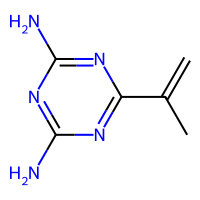
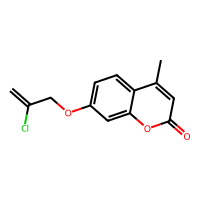
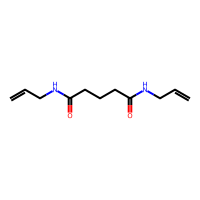
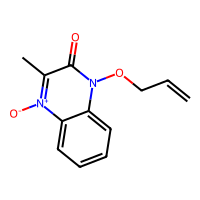
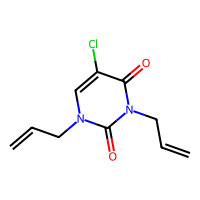
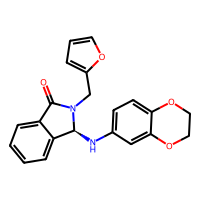
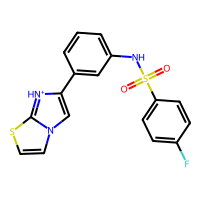
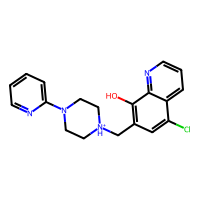
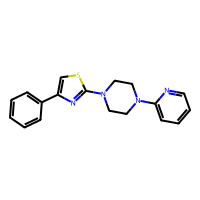
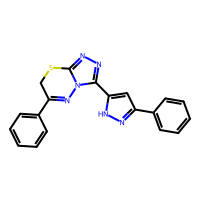